# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Assignment

1) Load the provided .csv file with the used car data

2) Use a linear regression to estimate the car prices from the year, kilometers or engine power. You can make a simple 1D regression from each one of the parameters independently (as an optional task you can also try a 2D or 3D regression combining multiple cues)

3) Firstly perform the estimation using the scipy linregress function (or alternatively you can use the sklearn.linear_model.LinearRegression class).
NB: check the documentation of the two methods!! In particular be aware of the number of outputs (in case use "_" to avoid the return of a specific output).

4) Have a look at the correlation coefficient to see which of the 3 features works better

5) Then implement the least square algorithm: you should get exactly the same solution of linregress !

6) Plot the data and the lines representing the output of the linregress and least square algorithms


In [37]:
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model
import pandas as pd

In [39]:
filename = "data/km_year_power_price.csv"
dataset = pd.read_csv(filename)
print(dataset.columns)
print(len(dataset))

Index(['km', 'year', 'powerPS', 'avgPrice'], dtype='object')
1297


In [50]:
#df = dataset[['km', 'avgPrice']].copy()
#df_unique = df.groupby('km', as_index=False).mean()
#results_km = stats.linregress(x = df_unique['km'], y = df_unique['avgPrice'])
#results_km = stats.linregress(x = dataset['km'], y = dataset['avgPrice'])
print("rvalue(km): ", results_km.pvalue)


df = dataset[['year', 'avgPrice']].copy()
df_unique = df.groupby('year', as_index=False).mean()
results_year = stats.linregress(x = df_unique['year'], y = df_unique['avgPrice'])
print("rvalue(year): ", results_year.pvalue)



df = dataset[['powerPS', 'avgPrice']].copy()
df_unique = df.groupby('powerPS', as_index=False).mean()
results_year = stats.linregress(x = df_unique['powerPS'], y = df_unique['avgPrice'])
print("rvalue(powerPS): ", results_year.pvalue)

rvalue(km):  0.012362947203178239
rvalue(year):  3.5871684461551237e-10
rvalue(powerPS):  2.397089252581715e-09


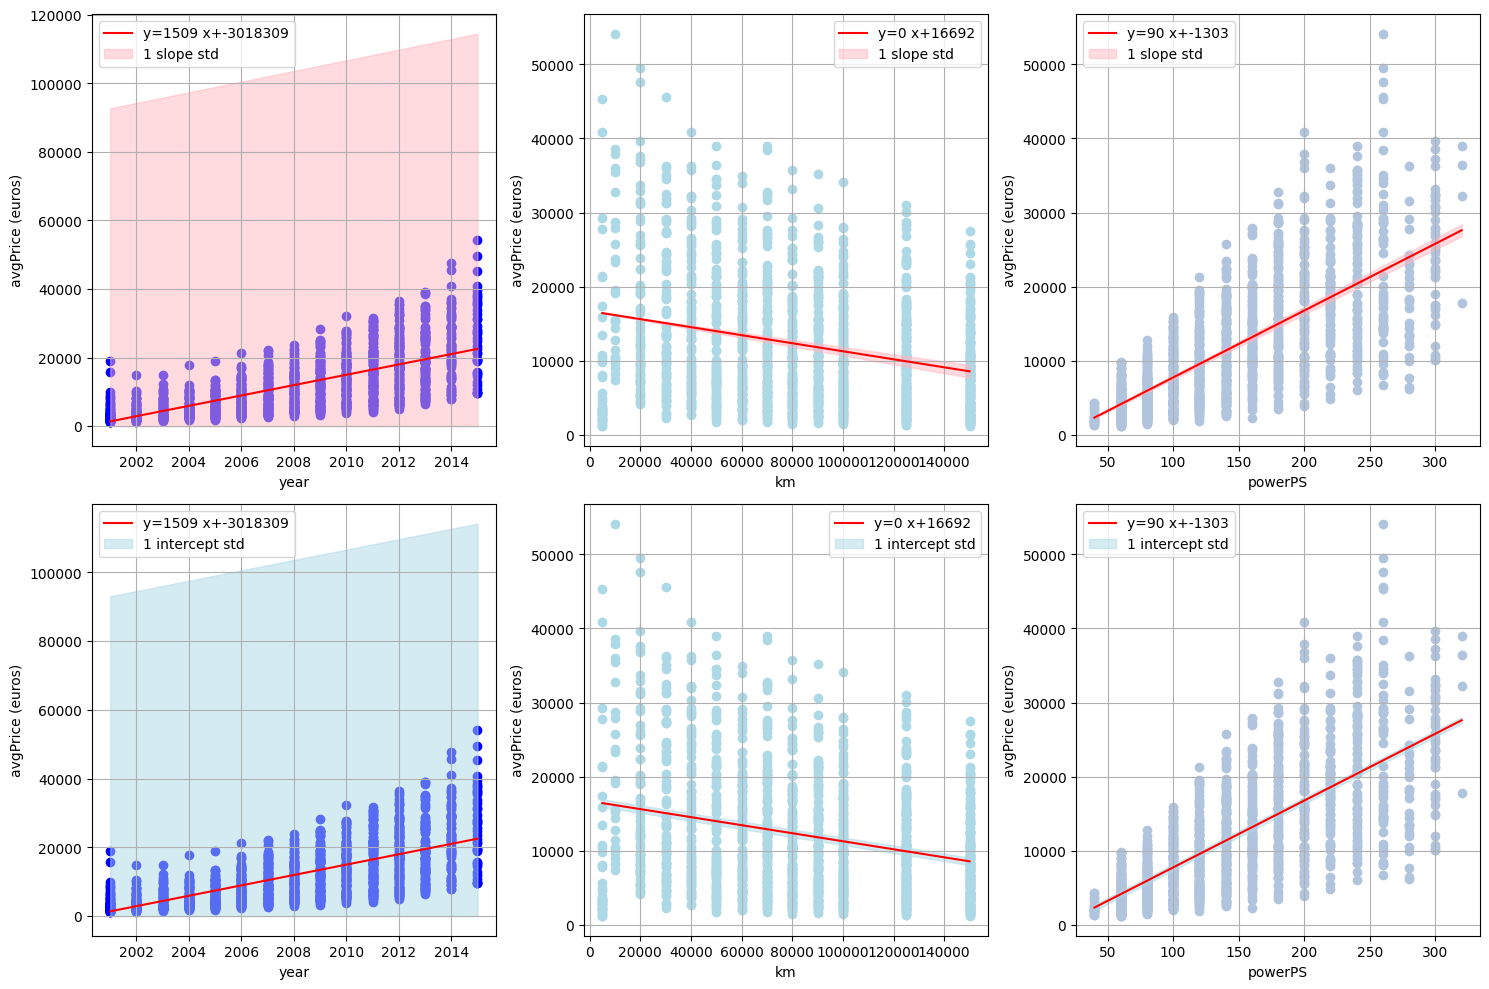

In [40]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2,3, figsize = (15, 10))
x_data = [dataset['year'], dataset['km'], dataset['powerPS']]
colors = ['blue', 'lightblue', 'lightsteelblue']
xlabels = ['year', 'km', 'powerPS']
results = [results_year, results_km, results_powerPS]
first_row_axes = [ax0, ax1, ax2]
for i, a in enumerate(first_row_axes):
    a.scatter(x_data[i], dataset['avgPrice'], color = colors[i])
    a.set_xlabel(xlabels[i])
    a.set_ylabel('avgPrice (euros)')
    x_reg = np.linspace(np.min(x_data[i]), np.max(x_data[i]), 1000)
    y_min = [(results[i].slope - results[i].stderr) * x + results[i].intercept for x in x_reg]
    y_min = [np.max([y, 0]) for y in y_min]
    y_max = [(results[i].slope + results[i].stderr) * x + results[i].intercept for x in x_reg]
    y_reg = [results[i].slope * x + results[i].intercept for x in x_reg]
    a.plot(x_reg,y_reg, color= 'red', label = "y=%0d x+%0d"%(results[i].slope, results[i].intercept))
    a.fill_between(x_reg, y1= y_min, y2= y_max, color = "lightpink", alpha = 0.5, label = "1 slope std")
    a.legend()
    a.grid()

second_row_axes = [ax3, ax4, ax5]
for i, a in enumerate(second_row_axes):
    a.scatter(x_data[i], dataset['avgPrice'], color = colors[i])
    a.set_xlabel(xlabels[i])
    a.set_ylabel('avgPrice (euros)')
    x_reg = np.linspace(np.min(x_data[i]), np.max(x_data[i]), 1000)
    y_reg = [results[i].slope * x + results[i].intercept for x in x_reg]

    y_min = [results[i].slope * x + results[i].intercept - results[i].intercept_stderr for x in x_reg]
    y_min = [np.max([y, 0]) for y in y_min]
    
    y_max = [results[i].slope * x + results[i].intercept + results[i].intercept_stderr for x in x_reg]
    a.plot(x_reg,y_reg, color= 'red', label = "y=%0d x+%0d"%(results[i].slope, results[i].intercept))
    a.fill_between(x_reg, y1= y_min, y2= y_max, color = "lightblue", alpha = 0.5, label = "1 intercept std")
    a.legend()
    a.grid()

plt.tight_layout()